# Loading Libraries

In [356]:
import pandas as pd # package for high-performance, easy-to-use data structures and data analysis
import numpy as np # fundamental package for scientific computing with Python
import matplotlib
import matplotlib.pyplot as plt # for plotting
import seaborn as sns # for making plots with seaborn
color = sns.color_palette()
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.offline as offline
offline.init_notebook_mode()
import plotly.tools as tls
#import squarify
#from mpl_toolkits.basemap import Basemap
from numpy import array
from matplotlib import cm

# Supress unnecessary warnings so that presentation looks clean
import warnings
warnings.filterwarnings("ignore")

# Print all rows and columns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


# Reading the DATA

In [357]:
data = pd.read_csv("NeogrowthDataSet.csv")
data.columns= ['ID', 'City_NAME','Industry_NAME', 'Funded_Amount','Days_past_Due', 'Loan_Tenure(Months)']

# Glimpse of Data

## Overview of tables

In [358]:
data.head(10)

,ID,City_NAME,Industry_NAME,Funded_Amount,Days_past_Due,Loan_Tenure(Months)
0,1,A,Apparel,"51,351,486",1287,21
1,2,B,Footwear,"169,664,209",1249,14
2,3,A,Gift and Novelties,"40,892,363",1318,10
3,4,B,Home Appliances,"26,207,606",1318,20
4,5,C,Food and Beverage,"41,268,190",1148,8
5,6,C,CDIT,"55,092,934",1141,17
6,7,C,Apparel,"94,780,623",1111,14
7,8,A,Groceries,"188,307,701",1141,7
8,9,C,Mobile and mobile accessories,"18,428,921",1115,12
9,10,A,Mobile and mobile accessories,"127,588,302",1159,6


In [359]:
data.tail(10)

,ID,City_NAME,Industry_NAME,Funded_Amount,Days_past_Due,Loan_Tenure(Months)
8573,8574,G,Footwear,"82,136,068",0,10
8574,8575,A,Tyres Accessories and Repairs,"79,102,186",2,17
8575,8576,T,Petrol Pump,"123,946,375",2,22
8576,8577,E,Food and Beverage,"33,289,466",0,10
8577,8578,J,Apparel,"129,646,309",1,9
8578,8579,J,Apparel,"75,768,155",1,20
8579,8580,F,Apparel,"194,916,505",0,8
8580,8581,F,Food and Beverage,"25,517,225",1,9
8581,8582,F,Others,"39,828,014",0,17
8582,8583,E,Apparel,"56,776,026",1,20


In [360]:
data.shape

(8583, 6)

## Statistical Overview of Data

### data some little info

In [361]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8583 entries, 0 to 8582
Data columns (total 6 columns):
ID                     8583 non-null int64
City_NAME              8583 non-null object
Industry_NAME          8583 non-null object
Funded_Amount          8583 non-null object
Days_past_Due          8583 non-null int64
Loan_Tenure(Months)    8583 non-null int64
dtypes: int64(3), object(3)
memory usage: 402.4+ KB


### Little description of data for numerical features

In [362]:
data.describe()

,ID,Days_past_Due,Loan_Tenure(Months)
count,8583.000000,8583.000000,8583.000000
mean,4292.000000,67.074100,15.027729
std,2477.843014,163.194685,5.470918
min,1.000000,0.000000,6.000000
25%,2146.500000,0.000000,10.000000
50%,4292.000000,5.000000,15.000000
75%,6437.500000,23.000000,20.000000
max,8583.000000,1318.000000,24.000000


### Little description of data for categorical features

In [363]:
data.describe(include=["O"])

,City_NAME,Industry_NAME,Funded_Amount
count,8583,8583,8583
unique,21,45,8583
top,C,Apparel,"90,299,251"
freq,1580,1616,1


# Data Preparation

## Checking for missing data

In [364]:
data.isnull().any()

ID                     False
City_NAME              False
Industry_NAME          False
Funded_Amount          False
Days_past_Due          False
Loan_Tenure(Months)    False
dtype: bool

# Lets Exploration Our Data!!

In [365]:
data.head()

,ID,City_NAME,Industry_NAME,Funded_Amount,Days_past_Due,Loan_Tenure(Months)
0,1,A,Apparel,"51,351,486",1287,21
1,2,B,Footwear,"169,664,209",1249,14
2,3,A,Gift and Novelties,"40,892,363",1318,10
3,4,B,Home Appliances,"26,207,606",1318,20
4,5,C,Food and Beverage,"41,268,190",1148,8


## Top Industry in which more loans were given

In [367]:
print(data['Industry_NAME'].value_counts())

Apparel                           1616
Food and Beverage                 1609
Groceries                          736
Others                             496
Petrol Pump                        496
Pharmacy                           370
CDIT                               366
Clinic and Lab                     323
Automobile Dealerships             268
Hardware                           248
Spa and Salon                      230
Hotels                             200
Footwear                           138
Furniture and Home Furnishing      134
Mobile and mobile accessories      130
Home Appliances                    128
Gift and Novelties                 110
Authentic Jewellery                 94
Tyres Accessories and Repairs       93
Books and Stationary                80
Service Station and Repairs         71
Logistics                           60
IT Service                          58
Optician                            51
Tours and Travels                   50
Cosmetics                

count_target = pd.value_counts(data['Industry'], sort = True).sort_index()
count_target.plot(kind = 'bar',)
plt.title("Loan repayment delinquency histogram")
plt.xlabel("Repayment Delinquency Status")
plt.ylabel("Frequency")

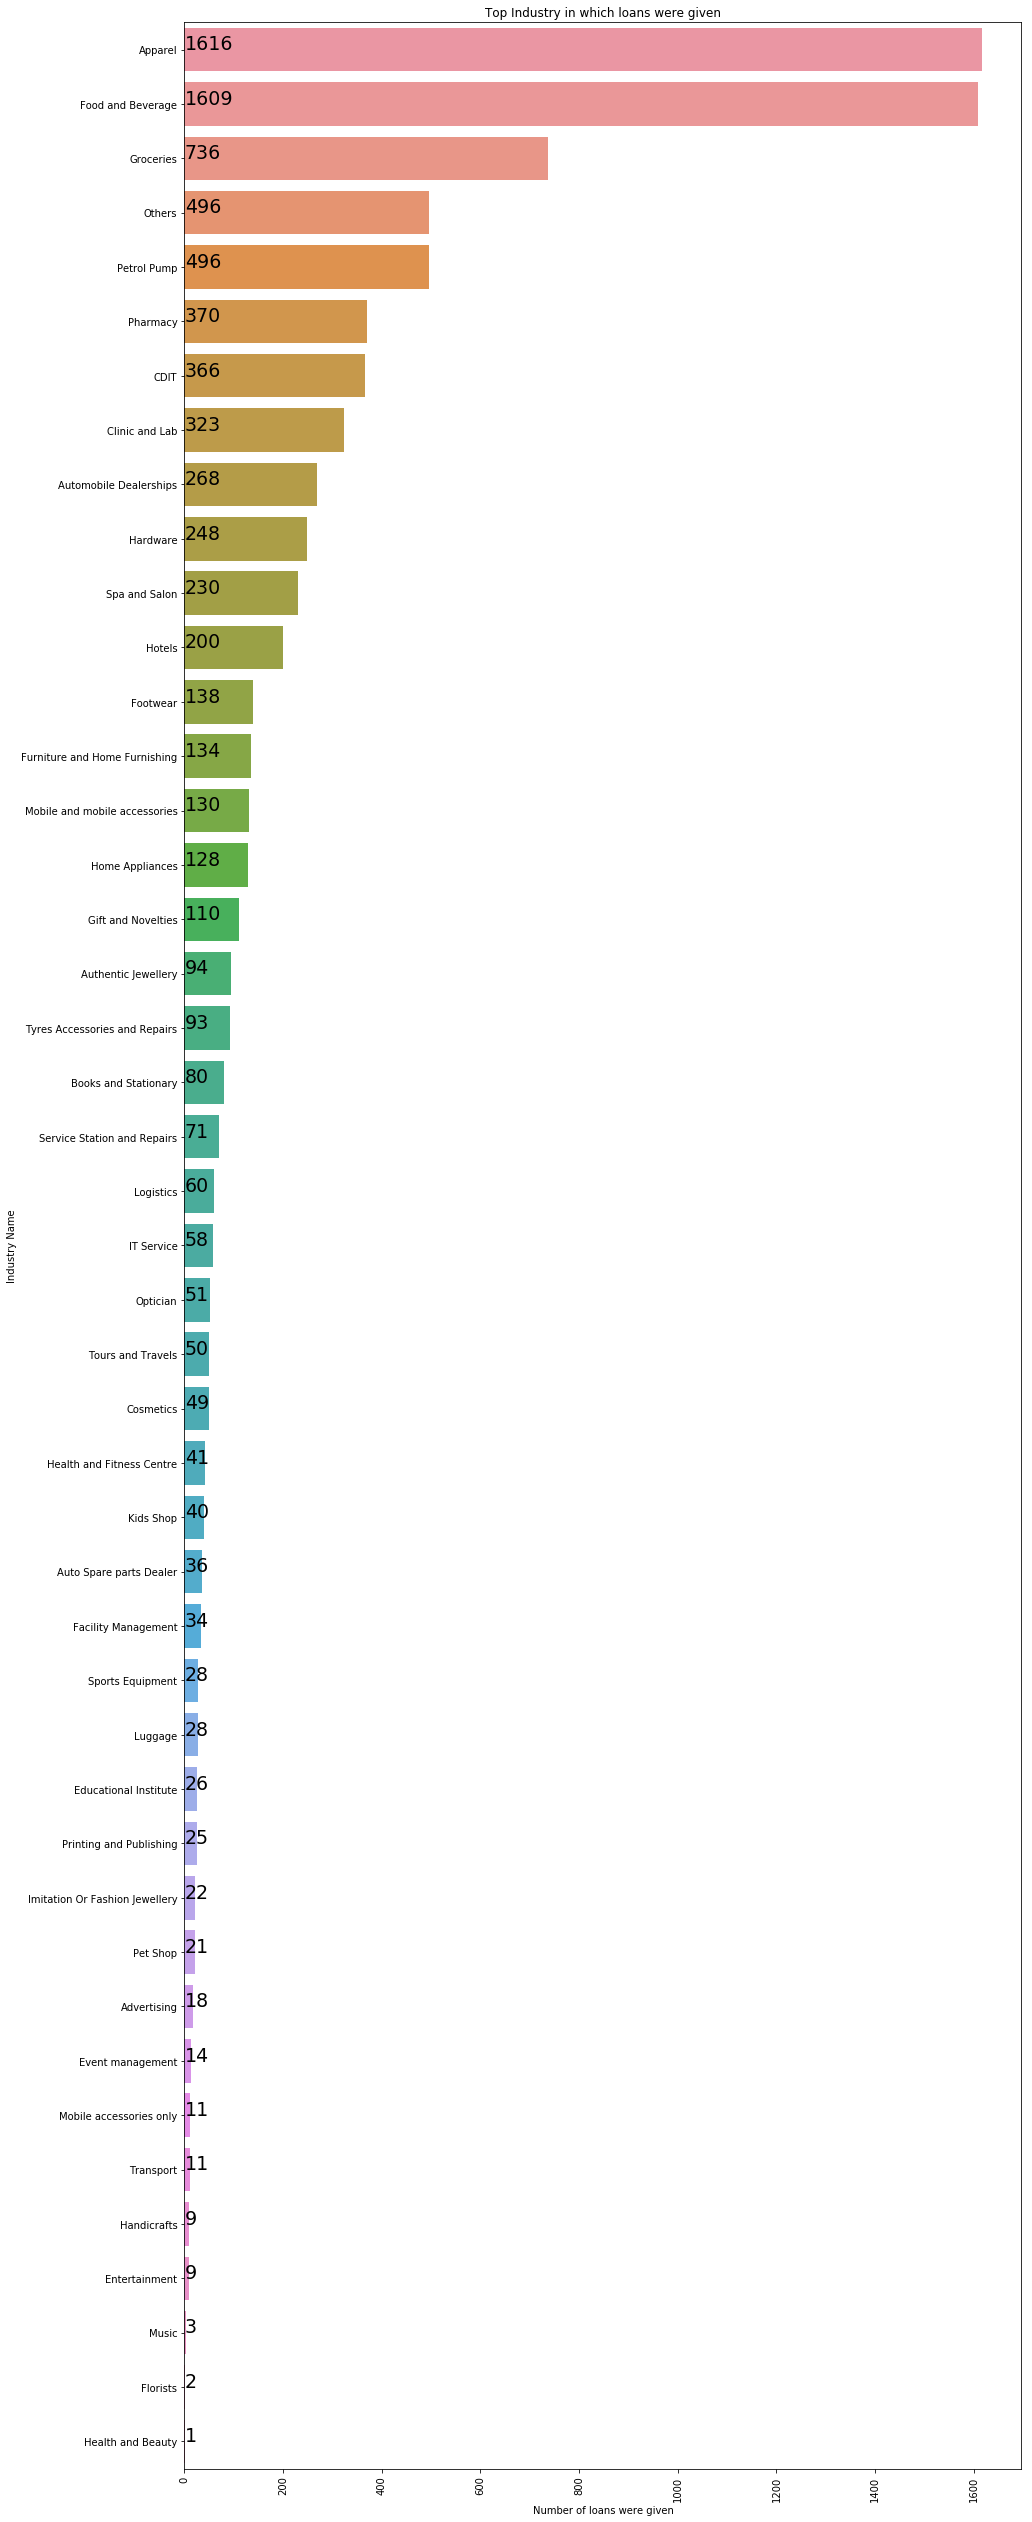

In [369]:
plt.figure(figsize=(15,45))
sector_name = data['Industry_NAME'].value_counts()
sns.barplot(sector_name.values, sector_name.index)
for i, v in enumerate(sector_name.values):
    plt.text(0.5,i,v,color='k',fontsize=19)
plt.xticks(rotation='vertical')
plt.xlabel('Number of loans were given')
plt.ylabel('Industry Name')
plt.title("Top Industry in which loans were given")
plt.show()

"Apparel" & "Food and Beverage" are two industries which are at Top out of total industries with just few numbers apart. 

"Health and Beauty", "Florists" and "Music" are worst industries. 

## Most frequent Cities who got loans

In [370]:
data.head()

,ID,City_NAME,Industry_NAME,Funded_Amount,Days_past_Due,Loan_Tenure(Months)
0,1,A,Apparel,"51,351,486",1287,21
1,2,B,Footwear,"169,664,209",1249,14
2,3,A,Gift and Novelties,"40,892,363",1318,10
3,4,B,Home Appliances,"26,207,606",1318,20
4,5,C,Food and Beverage,"41,268,190",1148,8


In [372]:
print(data['City_NAME'].value_counts())

C    1580
F    1495
B    1356
A    1323
E     772
D     763
H     316
G     192
I     136
J     111
L      86
K      74
O      61
M      60
S      59
N      50
T      43
Q      31
U      26
R      26
P      23
Name: City_NAME, dtype: int64


Text(0.5,1,'Most frequent cities for loan')

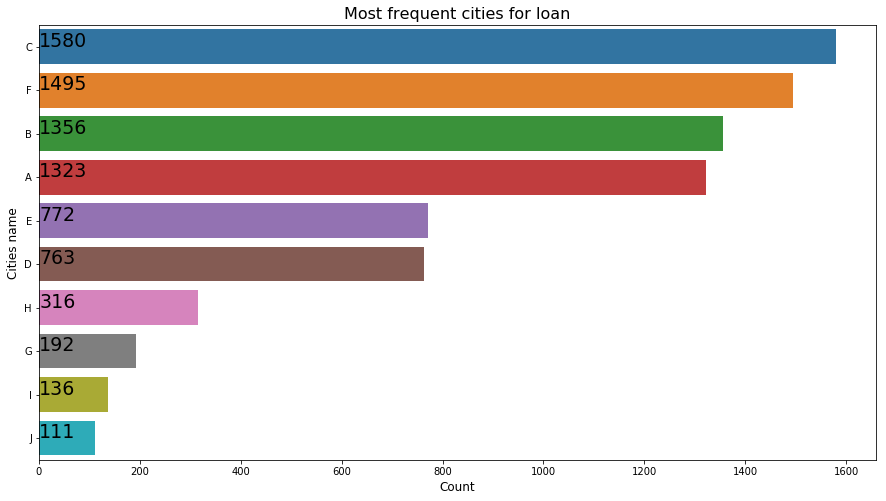

In [373]:
# Plot the most frequent Cities
plt.figure(figsize=(15,8))
count = data['City_NAME'].value_counts().head(10)
sns.barplot(count.values, count.index, )
for i, v in enumerate(count.values):
    plt.text(0.8,i,v,color='k',fontsize=19)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Cities name', fontsize=12)
plt.title("Most frequent cities for loan", fontsize=16)

"C" is most frequent city who got more loans followed by "F".

"J" is the most worst city.

In [374]:
data.columns

Index(['ID', 'City_NAME', 'Industry_NAME', 'Funded_Amount', 'Days_past_Due',
       'Loan_Tenure(Months)'],
      dtype='object')

## Most frequent Loan Tenure in Months

In [375]:
data.head()

,ID,City_NAME,Industry_NAME,Funded_Amount,Days_past_Due,Loan_Tenure(Months)
0,1,A,Apparel,"51,351,486",1287,21
1,2,B,Footwear,"169,664,209",1249,14
2,3,A,Gift and Novelties,"40,892,363",1318,10
3,4,B,Home Appliances,"26,207,606",1318,20
4,5,C,Food and Beverage,"41,268,190",1148,8


In [198]:
#data['Loan_Tenure(Months)'] =  data['Loan_Tenure(Months)'].astype(str)

In [376]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8583 entries, 0 to 8582
Data columns (total 6 columns):
ID                     8583 non-null int64
City_NAME              8583 non-null object
Industry_NAME          8583 non-null object
Funded_Amount          8583 non-null object
Days_past_Due          8583 non-null int64
Loan_Tenure(Months)    8583 non-null int64
dtypes: int64(3), object(3)
memory usage: 402.4+ KB


In [377]:
print(data['Loan_Tenure(Months)'].value_counts())

23    493
11    480
9     479
12    472
21    469
6     467
13    466
16    465
19    462
14    458
22    454
17    448
15    434
18    431
24    429
7     426
20    424
8     420
10    406
Name: Loan_Tenure(Months), dtype: int64


Text(0,0.5,'Count')

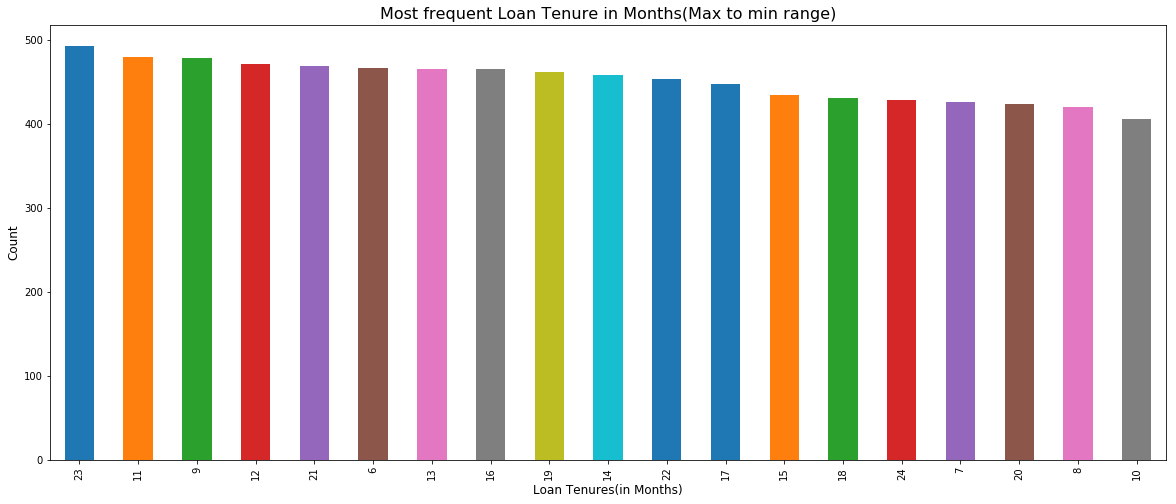

In [378]:
plt.figure(figsize=(20,8))
count_target = pd.value_counts(data['Loan_Tenure(Months)']).sort_values(ascending=False)
count_target.plot(kind = 'bar')
plt.title("Most frequent Loan Tenure in Months(Max to min range)", fontsize=16)
plt.xlabel("Loan Tenures(in Months)", fontsize=12)
plt.ylabel("Count", fontsize=12)

## Top most Loan Health's

Performance of any given loan is measured by the Days past dues(DPDs) for the case. The less the DPDs, the better will be the loan health.

In [379]:
data.head()

,ID,City_NAME,Industry_NAME,Funded_Amount,Days_past_Due,Loan_Tenure(Months)
0,1,A,Apparel,"51,351,486",1287,21
1,2,B,Footwear,"169,664,209",1249,14
2,3,A,Gift and Novelties,"40,892,363",1318,10
3,4,B,Home Appliances,"26,207,606",1318,20
4,5,C,Food and Beverage,"41,268,190",1148,8


In [380]:
#print(data['Days_past_Due'].value_counts())
print(data['Days_past_Due'].value_counts().sort_values(ascending=False))

0       2432
1        751
2        427
3        316
4        315
7        315
5        281
6        279
8        262
15       173
9        155
10       104
11        98
13        90
12        84
14        80
16        59
30        51
17        43
19        39
18        38
21        35
22        33
23        27
28        27
20        26
36        22
31        20
248       20
25        19
26        19
29        18
308       18
188       17
34        17
24        17
98        17
45        16
44        15
38        15
83        14
128       14
278       14
27        13
279       13
40        13
35        12
60        12
92        12
32        11
91        10
139       10
39        10
256       10
110       10
37        10
339        9
75         9
136        9
52         9
169        9
97         9
96         9
55         8
77         8
146        8
174        8
185        8
68         8
82         8
197        8
126        8
58         8
50         8
164        8
166        8
49         8

There are 2432 loans who's health is in excellent mode, which directly means that loans have been paid before or on the tentative date of loan payment.

Also there 751 loans who paid the loan just a day after the tentaive date of loan payment.
427 loans who paid the loan 2 days after the tentaive date of loan payment.
316 loan who paid the loan 3 days after the tentaive date of loan payment. and so on from the above aggregation.

And so all the above loans with count of 2432, 751 and 316  can be  considered as excellent and in good health.
As you move downwards from above table, there are customers who's "days past dues" are very high which results in bad, very bad and poor health of loans.

# Performance of City w.r.t DPD's

In [381]:
data.head()

,ID,City_NAME,Industry_NAME,Funded_Amount,Days_past_Due,Loan_Tenure(Months)
0,1,A,Apparel,"51,351,486",1287,21
1,2,B,Footwear,"169,664,209",1249,14
2,3,A,Gift and Novelties,"40,892,363",1318,10
3,4,B,Home Appliances,"26,207,606",1318,20
4,5,C,Food and Beverage,"41,268,190",1148,8


In [382]:
data['Days_past_Due'].max()

1318

In [383]:
data.groupby('City_NAME').Days_past_Due.agg(['count','min','mean','max'])

,count,min,mean,max
City_NAME,,,,
A,1323,0,83.270597,1318
B,1356,0,56.584071,1318
C,1580,0,92.088608,1148
D,763,0,62.246396,988
E,772,0,54.345855,975
F,1495,0,66.341806,885
G,192,0,105.833333,848
H,316,0,59.332278,780
I,136,0,43.125000,661


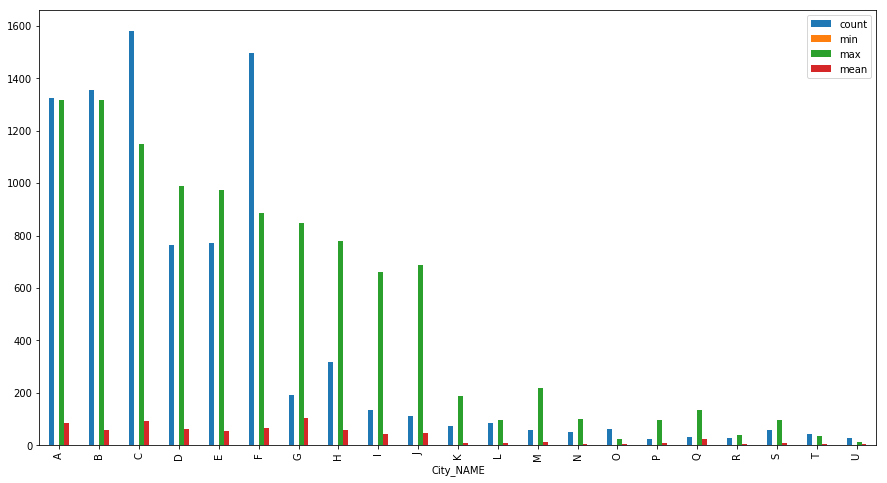

In [384]:
data.groupby('City_NAME').Days_past_Due.agg(['count','min','max','mean']).plot(kind ='bar', figsize=(15,8))

If we look minimum number of "Days past Due" then every city has zero value, which means all of them are BEST PERFORMING w.r.t DPD's
But then we examine the maximum numbers of "Days past Due" it beomes clear , as every city has different value and so, on the basis of maximum number of DPD's the BEST PERFORMING CITY is:

U > O > T > R > S/P > L > N > Q > K > M > I > J > H > G > F > E > D > C >A/B 

and the WORST PERFORMING CITY is :
U < O < T < R < S/P < L < N < Q < K < M < I < J < H < G < F < E < D < C < A/B

#### BEST PERFORMING CITIES

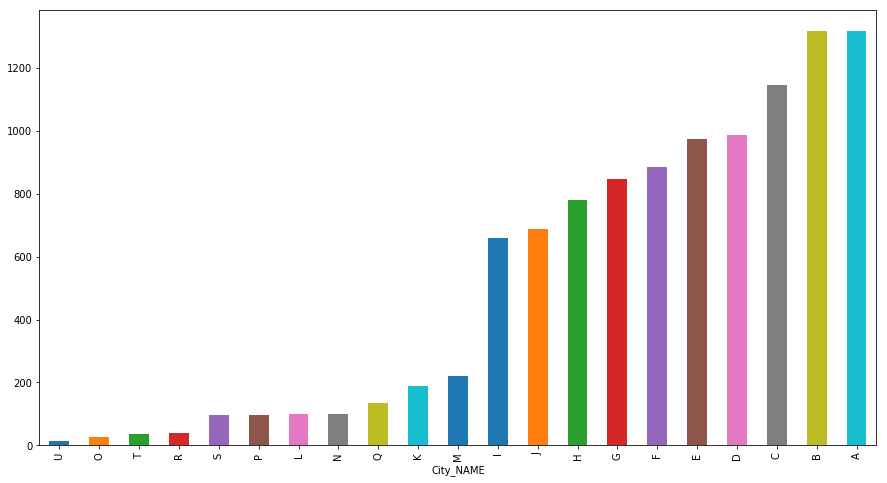

In [385]:
city_list_sorted = data.groupby('City_NAME').Days_past_Due.max().sort_values()
#numbers = sorted(industry_list)
#print(city_list_sorted)
city_list_sorted.plot(kind ='bar', figsize=(15,8))

### WORST PERFORMING CITIES

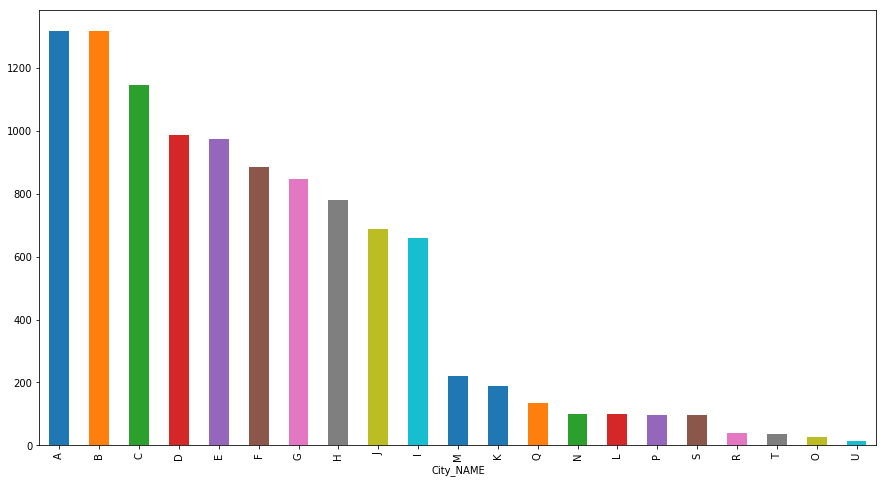

In [386]:
city_list_sorted = data.groupby('City_NAME').Days_past_Due.max().sort_values(ascending = False)
#numbers = sorted(industry_list)
#print(city_list_sorted)
city_list_sorted.plot(kind ='bar', figsize=(15,8))

# Performance of INDUSTRY w.r.t DPD's

In [387]:
data.head()

,ID,City_NAME,Industry_NAME,Funded_Amount,Days_past_Due,Loan_Tenure(Months)
0,1,A,Apparel,"51,351,486",1287,21
1,2,B,Footwear,"169,664,209",1249,14
2,3,A,Gift and Novelties,"40,892,363",1318,10
3,4,B,Home Appliances,"26,207,606",1318,20
4,5,C,Food and Beverage,"41,268,190",1148,8


In [388]:
data.groupby('Industry_NAME').Days_past_Due.agg(['count','min','mean','max'])

,count,min,mean,max
Industry_NAME,,,,
Advertising,18,0,11.444444,75
Apparel,1616,0,80.472153,1287
Authentic Jewellery,94,0,90.436170,936
Auto Spare parts Dealer,36,0,5.333333,99
Automobile Dealerships,268,0,51.511194,1080
Books and Stationary,80,0,62.987500,521
CDIT,366,0,104.871585,1141
Clinic and Lab,323,0,32.099071,624
Cosmetics,49,0,75.755102,934


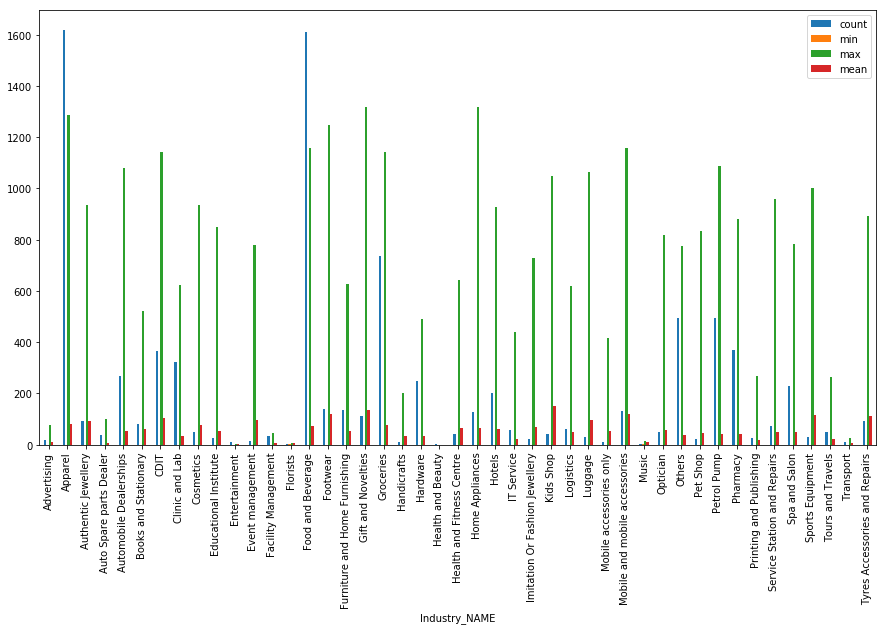

In [389]:
data.groupby('Industry_NAME').Days_past_Due.agg(['count','min','max','mean']).plot(kind ='bar', figsize=(15,8))

### BEST PERFORMING INDUSTRIES

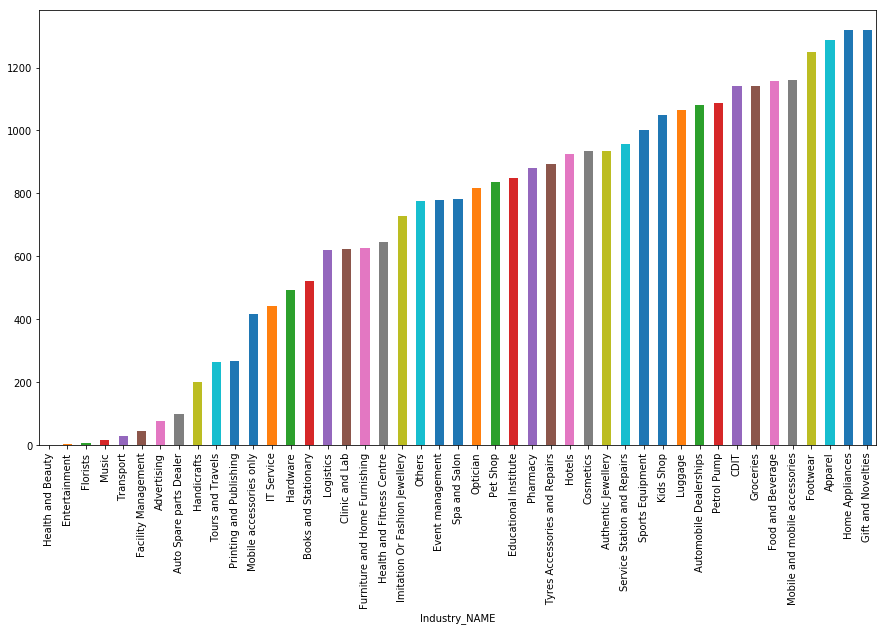

In [390]:
industry_list_sorted = data.groupby('Industry_NAME').Days_past_Due.max().sort_values()
#numbers = sorted(industry_list)
industry_list_sorted.plot(kind ='bar', figsize=(15,8))

BEST PERFORMING INDUSTRY is: from Health and Beauty > Entertainment > Florists > Music > Transport > Facility Management  > Advertising  > Auto Spare parts Dealer  > Handicrafts > Tours and Travels > Printing and Publishing > Mobile accessories only > IT Service > Hardware > Books and Stationary  to as shown in above graph

### WORST PERFORMING INDUSTRIES

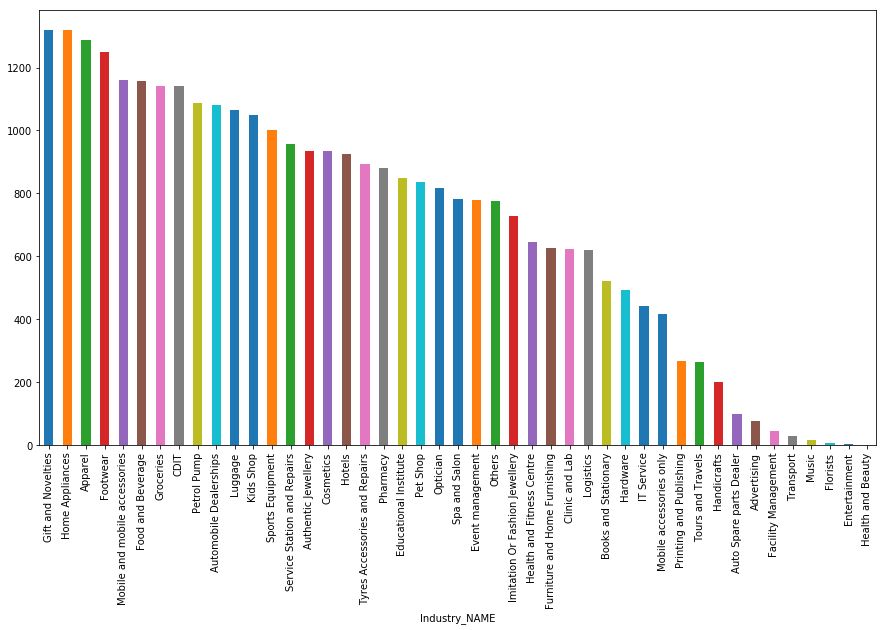

In [391]:
industry_list_sorted = data.groupby('Industry_NAME').Days_past_Due.max().sort_values(ascending = False)
#numbers = sorted(industry_list)
industry_list_sorted.plot(kind ='bar', figsize=(15,8))

From the above graph its clear the worst performing industries starts from Gift and Novelties > Home Appliances > Apparel > Footwear > Mobile and mobile accessories and so on.. 

# Performance of Loan_Tenure w.r.t DPD's

In [392]:
data.head()

,ID,City_NAME,Industry_NAME,Funded_Amount,Days_past_Due,Loan_Tenure(Months)
0,1,A,Apparel,"51,351,486",1287,21
1,2,B,Footwear,"169,664,209",1249,14
2,3,A,Gift and Novelties,"40,892,363",1318,10
3,4,B,Home Appliances,"26,207,606",1318,20
4,5,C,Food and Beverage,"41,268,190",1148,8


In [393]:
data.groupby('Loan_Tenure(Months)').Days_past_Due.agg(['count','min','mean','max'])

,count,min,mean,max
Loan_Tenure(Months),,,,
6,467,0,64.325482,1159
7,426,0,78.180751,1141
8,420,0,57.840476,1156
9,479,0,65.672234,996
10,406,0,70.298030,1318
11,480,0,59.985417,1080
12,472,0,60.883475,1143
13,466,0,70.980687,1146
14,458,0,62.548035,1249


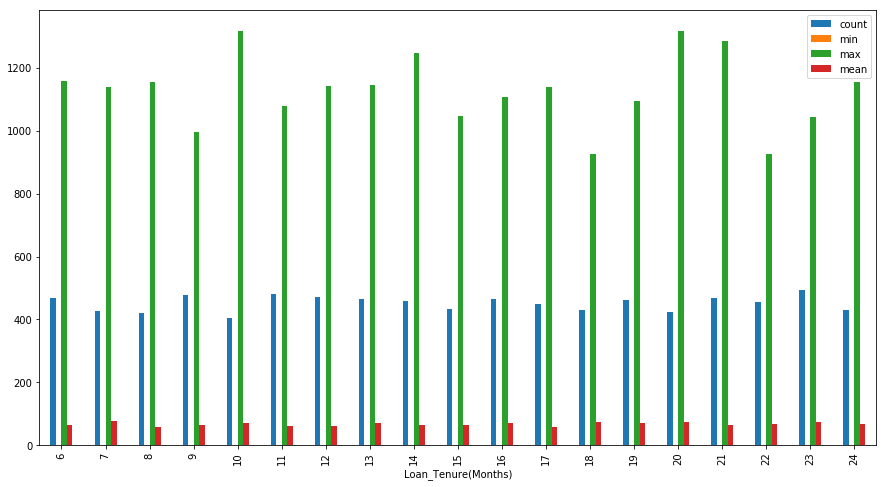

In [394]:
data.groupby('Loan_Tenure(Months)').Days_past_Due.agg(['count','min','max','mean']).plot(kind ='bar', figsize=(15,8))

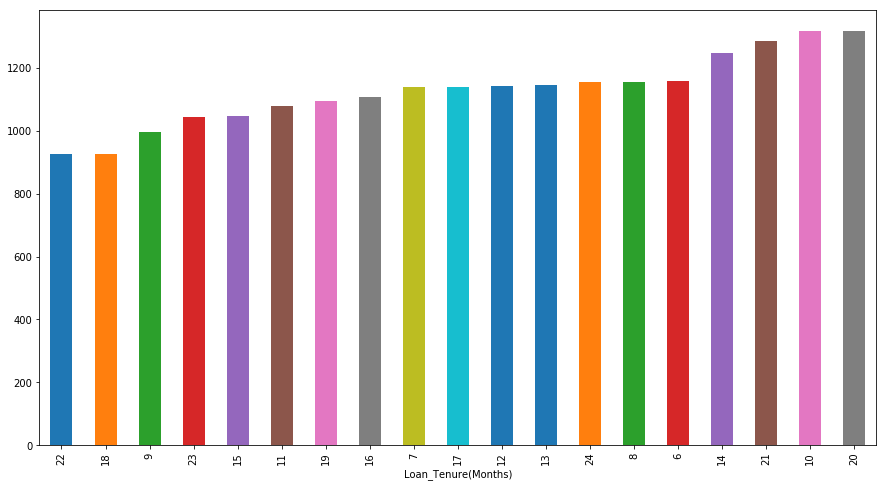

In [395]:
LoanTenure_list_sorted = data.groupby('Loan_Tenure(Months)').Days_past_Due.max().sort_values()
#numbers = sorted(industry_list)
LoanTenure_list_sorted.plot(kind ='bar', figsize=(15,8))

In [396]:
print(data.groupby('Loan_Tenure(Months)').Days_past_Due.max().sort_values())

Loan_Tenure(Months)
22     926
18     926
9      996
23    1043
15    1046
11    1080
19    1095
16    1108
7     1141
17    1141
12    1143
13    1146
24    1156
8     1156
6     1159
14    1249
21    1287
10    1318
20    1318
Name: Days_past_Due, dtype: int64


BEST PERFORMING LOAN TENURES(in Months):

22 > 18 > 9 > 23 > 15 > 11 > 19> 16 > 7 > 17> 12 > 13> 24 > 8 > 6 > 14 > 21 > 10 > 20

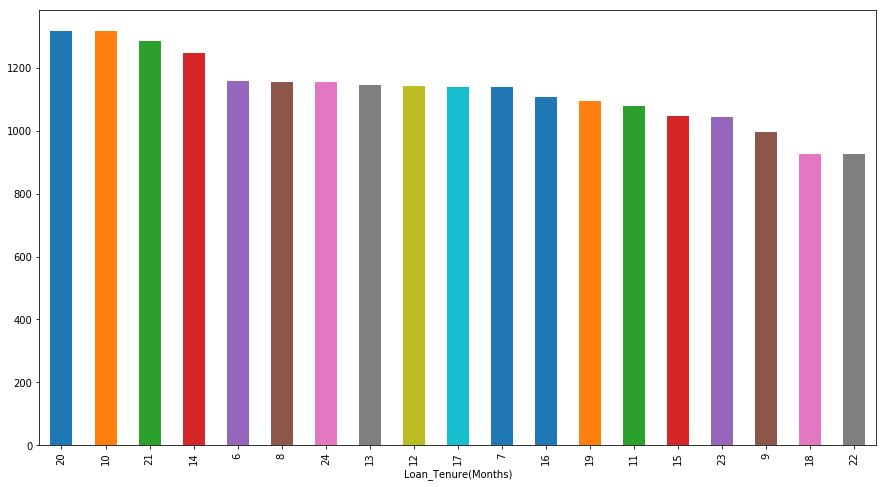

In [397]:
LoanTenure_list_sorted = data.groupby('Loan_Tenure(Months)').Days_past_Due.max().sort_values(ascending= False)
#numbers = sorted(industry_list)
LoanTenure_list_sorted.plot(kind ='bar', figsize=(15,8))

WORST PERFORMING LOAN TENURES(in Months):

22 < 18 < 9 < 23 < 15 < 11 < 19 < 16 < 7 < 17 < 12 < 13 < 24 < 8 < 6 < 14 < 21 < 10 < 20

# EXTRA ANALYSIS

## City wise Funded Amount distribution

In [344]:
data.head()

,ID,City_NAME,Industry_NAME,Funded_Amount,Days_past_Due,Loan_Tenure(Months)
0,1,A,Apparel,"51,351,486",1287,21
1,2,B,Footwear,"169,664,209",1249,14
2,3,A,Gift and Novelties,"40,892,363",1318,10
3,4,B,Home Appliances,"26,207,606",1318,20
4,5,C,Food and Beverage,"41,268,190",1148,8


In [257]:
trace = []
for name, group in data.groupby("City_NAME"):
    trace.append ( 
        go.Box(
            x=group["Funded_Amount"].values,
            name=name
        )
    )
layout = go.Layout(
    title='Funded_Amount Distribution by city',
    width = 800,
    height = 1000
)
#data = [trace0, trace1]
fig = go.Figure(data=trace, layout=layout)
py.iplot(fig, filename="Funded_Amount_by_City")

## Industry Name wise Funded Amount distribution 

In [346]:
data.head()

,ID,City_NAME,Industry_NAME,Funded_Amount,Days_past_Due,Loan_Tenure(Months)
0,1,A,Apparel,"51,351,486",1287,21
1,2,B,Footwear,"169,664,209",1249,14
2,3,A,Gift and Novelties,"40,892,363",1318,10
3,4,B,Home Appliances,"26,207,606",1318,20
4,5,C,Food and Beverage,"41,268,190",1148,8


In [345]:
trace = []
for name, group in data.groupby("Industry_NAME"):
    trace.append ( 
        go.Box(
            x=group["Funded_Amount"].values,
            name=name
        )
    )
layout = go.Layout(
    title='Funded_Amount Distribution by city',
    width = 800,
    height = 2000
)
#data = [trace0, trace1]
fig = go.Figure(data=trace, layout=layout)
py.iplot(fig, filename="Funded_Amount_by_City")

## City wise Days_past_Due distribution

In [348]:
data.head()

,ID,City_NAME,Industry_NAME,Funded_Amount,Days_past_Due,Loan_Tenure(Months)
0,1,A,Apparel,"51,351,486",1287,21
1,2,B,Footwear,"169,664,209",1249,14
2,3,A,Gift and Novelties,"40,892,363",1318,10
3,4,B,Home Appliances,"26,207,606",1318,20
4,5,C,Food and Beverage,"41,268,190",1148,8


In [347]:
trace = []
for name, group in data.groupby("City_NAME"):
    trace.append ( 
        go.Box(
            x=group["Days_past_Due"].values,
            name=name
        )
    )
layout = go.Layout(
    title='Days_past_Due Distribution by city',
    width = 800,
    height = 2000
)
#data = [trace0, trace1]
fig = go.Figure(data=trace, layout=layout)
py.iplot(fig, filename="Days_past_Due_by_City")

## Industry wise Days_past_Due distribution

In [350]:
data.head()

,ID,City_NAME,Industry_NAME,Funded_Amount,Days_past_Due,Loan_Tenure(Months)
0,1,A,Apparel,"51,351,486",1287,21
1,2,B,Footwear,"169,664,209",1249,14
2,3,A,Gift and Novelties,"40,892,363",1318,10
3,4,B,Home Appliances,"26,207,606",1318,20
4,5,C,Food and Beverage,"41,268,190",1148,8


In [349]:
trace = []
for name, group in data.groupby("Industry_NAME"):
    trace.append ( 
        go.Box(
            x=group["Days_past_Due"].values,
            name=name
        )
    )
layout = go.Layout(
    title='Days_past_Due Distribution by Industry_NAME',
    width = 800,
    height = 2000
)
#data = [trace0, trace1]
fig = go.Figure(data=trace, layout=layout)
py.iplot(fig, filename="Days_past_Due_by_Industry_NAME")

## City wise Loan_Tenure distribution

In [352]:
data.head()

,ID,City_NAME,Industry_NAME,Funded_Amount,Days_past_Due,Loan_Tenure(Months)
0,1,A,Apparel,"51,351,486",1287,21
1,2,B,Footwear,"169,664,209",1249,14
2,3,A,Gift and Novelties,"40,892,363",1318,10
3,4,B,Home Appliances,"26,207,606",1318,20
4,5,C,Food and Beverage,"41,268,190",1148,8


In [400]:
trace = []
for name, group in data.groupby("City_NAME"):
    trace.append ( 
        go.Box(
            x=group["Loan_Tenure(Months)"].values,
            name=name
        )
    )
layout = go.Layout(
    title='Days_past_Due Distribution by Funded_Amount',
    width = 600,
    height = 1000
)
#data = [trace0, trace1]
fig = go.Figure(data=trace, layout=layout)
py.iplot(fig, filename="Loan_Tenure_by_City_NAME")

## Industry_NAME wise Loan_Tenure distribution

In [354]:
data.head()

,ID,City_NAME,Industry_NAME,Funded_Amount,Days_past_Due,Loan_Tenure(Months)
0,1,A,Apparel,"51,351,486",1287,21
1,2,B,Footwear,"169,664,209",1249,14
2,3,A,Gift and Novelties,"40,892,363",1318,10
3,4,B,Home Appliances,"26,207,606",1318,20
4,5,C,Food and Beverage,"41,268,190",1148,8


In [401]:
trace = []
for name, group in data.groupby("Industry_NAME"):
    trace.append ( 
        go.Box(
            x=group["Loan_Tenure(Months)"].values,
            name=name
        )
    )
layout = go.Layout(
    title='Days_past_Due Distribution by Funded_Amount',
    width = 800,
    height = 2000
)
#data = [trace0, trace1]
fig = go.Figure(data=trace, layout=layout)
py.iplot(fig, filename="Loan_Tenure_by_Industry_NAME")

# SUMMARY

#### 1.) While looking at the Statistical overview of data, we found that datatype of few columns were not correct to perform any operation and so we changed the datatype, specially for "Days pas Dues" which contains numerical values but its predefined datatype is String type.

Also checked the null values in the dataset which may affect the analysis, so the better option is to noramlise the dataset before performing any activity over it.

#### 2.) In Data Exploration part, we better understand our data to dig deep into it.

"Apparel" & "Food and Beverage" are two industries which are at Top out of total industries with just few numbers apart. 
"Health and Beauty", "Florists" and "Music" are worst industries. 


"C" is most frequent city who got more loans followed by "F".
"J" is the most worst city.

Lastly, we looked in Most frequent Loan Tenure and Top most Loan Health's, namely:
There are 2432 loans who's health is in excellent mode, which directly means that loans have been paid before or on the tentative date of loan payment.

Also there 751 loans who paid the loan just a day after the tentaive date of loan payment.427 loans who paid the loan 2 days after the tentaive date of loan payment.316 loan who paid the loan 3 days after the tentaive date of loan payment. and so on from the above aggregation. 

And so all the above loans with count of 2432, 751 and 316  can be  considered as excellent and in good health.
As you move downwards from above table, there are customers who's "days past dues" are very high which results in bad, very bad and poor health of loans.

#### 3.)Performance of City w.r.t DPD's:


If we look minimum number of "Days past Due" then every city has zero value, which means all of them are BEST PERFORMING w.r.t DPD's
But then we examine the maximum numbers of "Days past Due" it beomes clear , as every city has different value and so, on the basis of maximum number of DPD's the BEST PERFORMING CITY is:
U > O > T > R > S/P > L > N > Q > K > M > I > J > H > G > F > E > D > C >A/B 


and the WORST PERFORMING CITY is :
U < O < T < R < S/P < L < N < Q < K < M < I < J < H < G < F < E < D < C < A/B



#### 4.) Performance of INDUSTRY w.r.t DPD's:

BEST PERFORMING INDUSTRY is: from Health and Beauty > Entertainment > Florists > Music > Transport > Facility Management  > Advertising  > Auto Spare parts Dealer  > Handicrafts > Tours and Travels > Printing and Publishing > Mobile accessories only > IT Service > Hardware > Books and Stationary  to as shown in above graph.

From the above graph its clear the worst performing industries starts from Gift and Novelties > Home Appliances > Apparel > Footwear > Mobile and mobile accessories and so on.. 

#### 5.) Performance of Loan_Tenure w.r.t DPD's:

BEST PERFORMING LOAN TENURES(in Months):
22 > 18 > 9 > 23 > 15 > 11 > 19> 16 > 7 > 17> 12 > 13> 24 > 8 > 6 > 14 > 21 > 10 > 20


WORST PERFORMING LOAN TENURES(in Months):
22 < 18 < 9 < 23 < 15 < 11 < 19 < 16 < 7 < 17 < 12 < 13 < 24 < 8 < 6 < 14 < 21 < 10 < 20




Addition to that, we have analysie:

City wise Funded Amount distribution,
Industry Name wise Funded Amount distribution,
City wise Days_past_Due distribution,
Industry wise Days_past_Due distribution,
City wise Loan_Tenure distribution,Industry_NAME wise Loan_Tenure distribution